Напишіть Python функцію, яка рахує середньоквадратичну похибку регресійної моделі. Функція має приймати у якості входу два спискі: `y_pred` (предикт моделі) та `y_true` (реальні таргетні значення). Функція має повертати лише значення похибки.

### спосіб №1 (написана функція)

In [70]:
import pandas as pd

In [71]:
# створюємо наш датасет з даними для функції
df = pd.DataFrame.from_dict({
    'x_true': [1, 1, 2, 3, 5, 8, 13, 21, 34, 55], 
    'y_true': [2, 2, 4, 6, 12, 16, 26, 42, 74, 110]
})

df.head(n=10)

,x_true,y_true
0,1,2
1,1,2
2,2,4
3,3,6
4,5,12
5,8,16
6,13,26
7,21,42
8,34,74
9,55,110


In [60]:
# візуалізуємо його
import seaborn as sns
import matplotlib.pyplot as plt

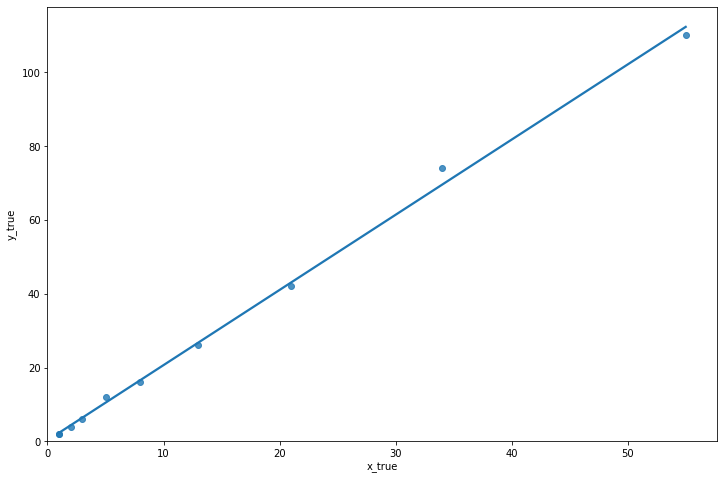

In [73]:
plt.figure(figsize=(12, 8))

sns.regplot(data=df, x='x_true', y='y_true', ci=None)

plt.ylim(bottom=0)
plt.xlim(left=0)

plt.show()

In [74]:
# застосовуємо лінійну регресію
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()
model.fit(df[['x_true']], df['y_true'])
df['y_pred'] = model.predict(df[['x_true']])

df.head(n=20)

,x_true,y_true,y_pred
0,1,2,2.335216
1,1,2,2.335216
2,2,4,4.370162
3,3,6,6.405109
4,5,12,10.475001
5,8,16,16.579839
6,13,26,26.754570
7,21,42,43.034139
8,34,74,69.488439
9,55,110,112.222308


In [76]:
# створюємо змінні
x_true = df['x_true']
y_true = df['y_true']
y_pred = df['y_pred']

In [77]:
# робимо функцію

def mse(true, pred):
    summ = 0
    n = len(true) 
    for i in range (0, n): 
        diff = true[i] - pred[i] 
        squared_diff = diff**2  
        summ = summ + squared_diff  
    return f'Середньоквадратична похибка регресійної моделі: {round(summ / n, 5)}'

In [78]:
mse(df['y_true'], df['y_pred'])

'Середньоквадратична похибка регресійної моделі: 3.01194'

### спосіб №2 (вбудована функція) або перевірка

In [79]:
# використаємо вбудовану функцію
from sklearn.metrics import mean_squared_error

In [80]:
round(mean_squared_error(y_true, y_pred), 5)

3.01194